# Importing libraries and packages

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

# Loading dataset

In [3]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Explanatory

### Missing data

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heat map to check correlation

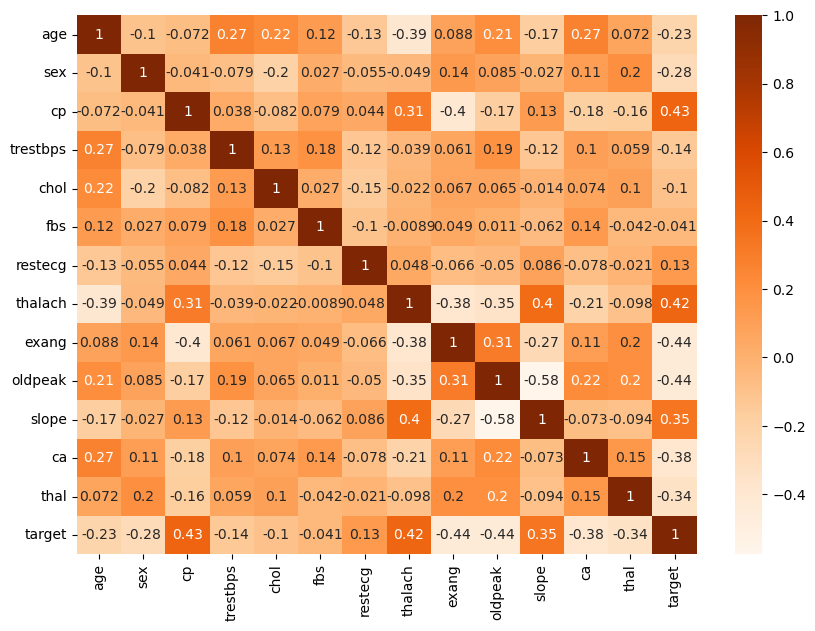

In [5]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap="Oranges")
plt.show()

In [6]:
correlation = abs(pd.DataFrame(df.corr().target))
correlation

,target
age,0.229324
sex,0.279501
cp,0.434854
trestbps,0.138772
chol,0.099966
fbs,0.041164
restecg,0.134468
thalach,0.422895
exang,0.438029
oldpeak,0.438441


### Visualization target base on features

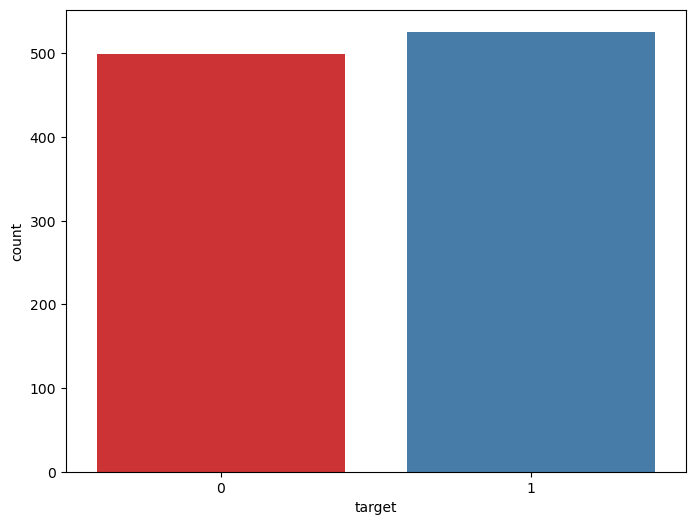

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x="target", data=df, palette="Set1")
plt.show()

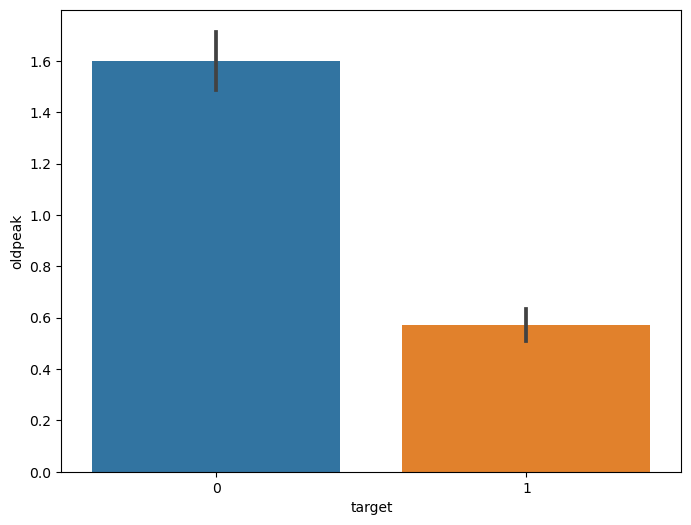

In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(x="target", y="oldpeak", data=df)
plt.show()

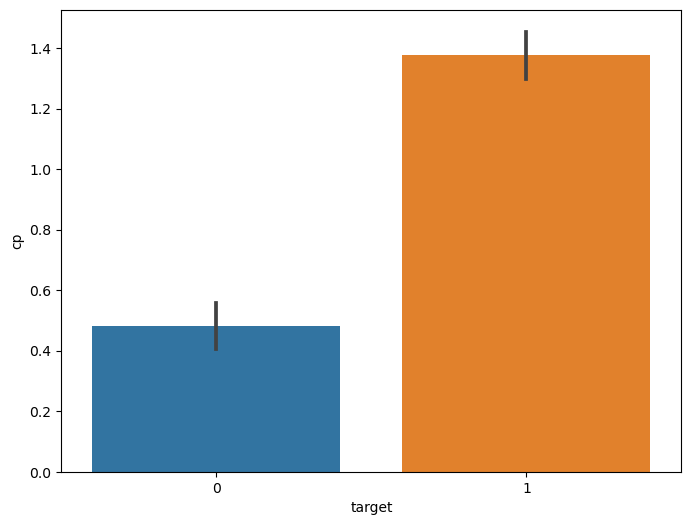

In [19]:
plt.figure(figsize=(8, 6))
sns.barplot(x="target", y="cp", data=df)
plt.show()

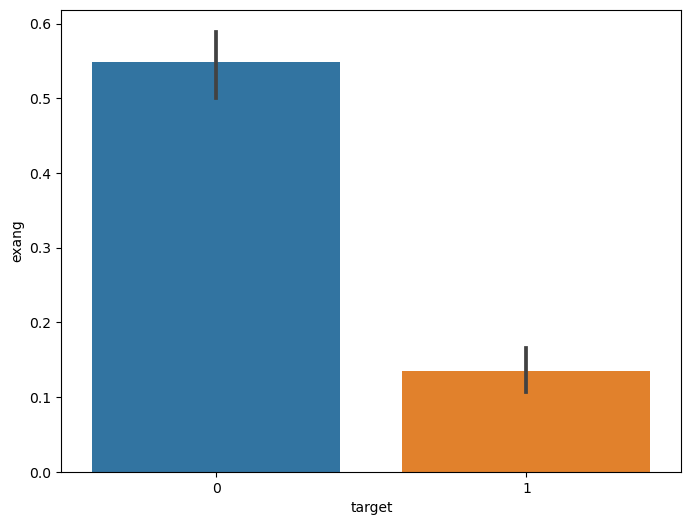

In [27]:
plt.figure(figsize=(8, 6))
sns.barplot(x="target", y="exang", data=df)
plt.show()

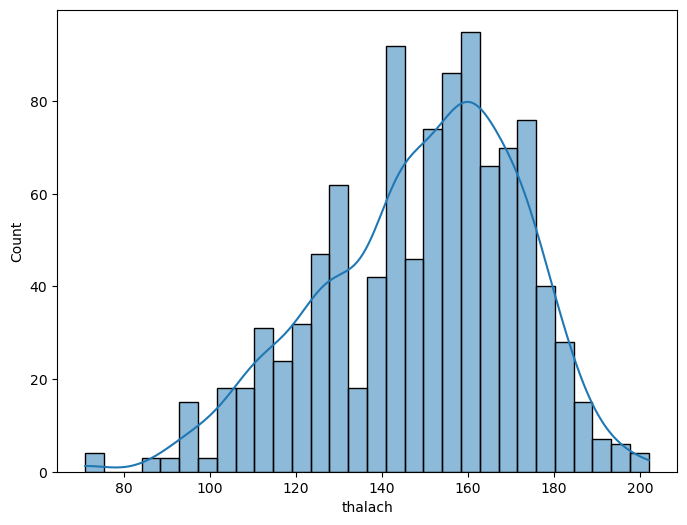

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(df['thalach'], bins=30, kde=True)
plt.show()

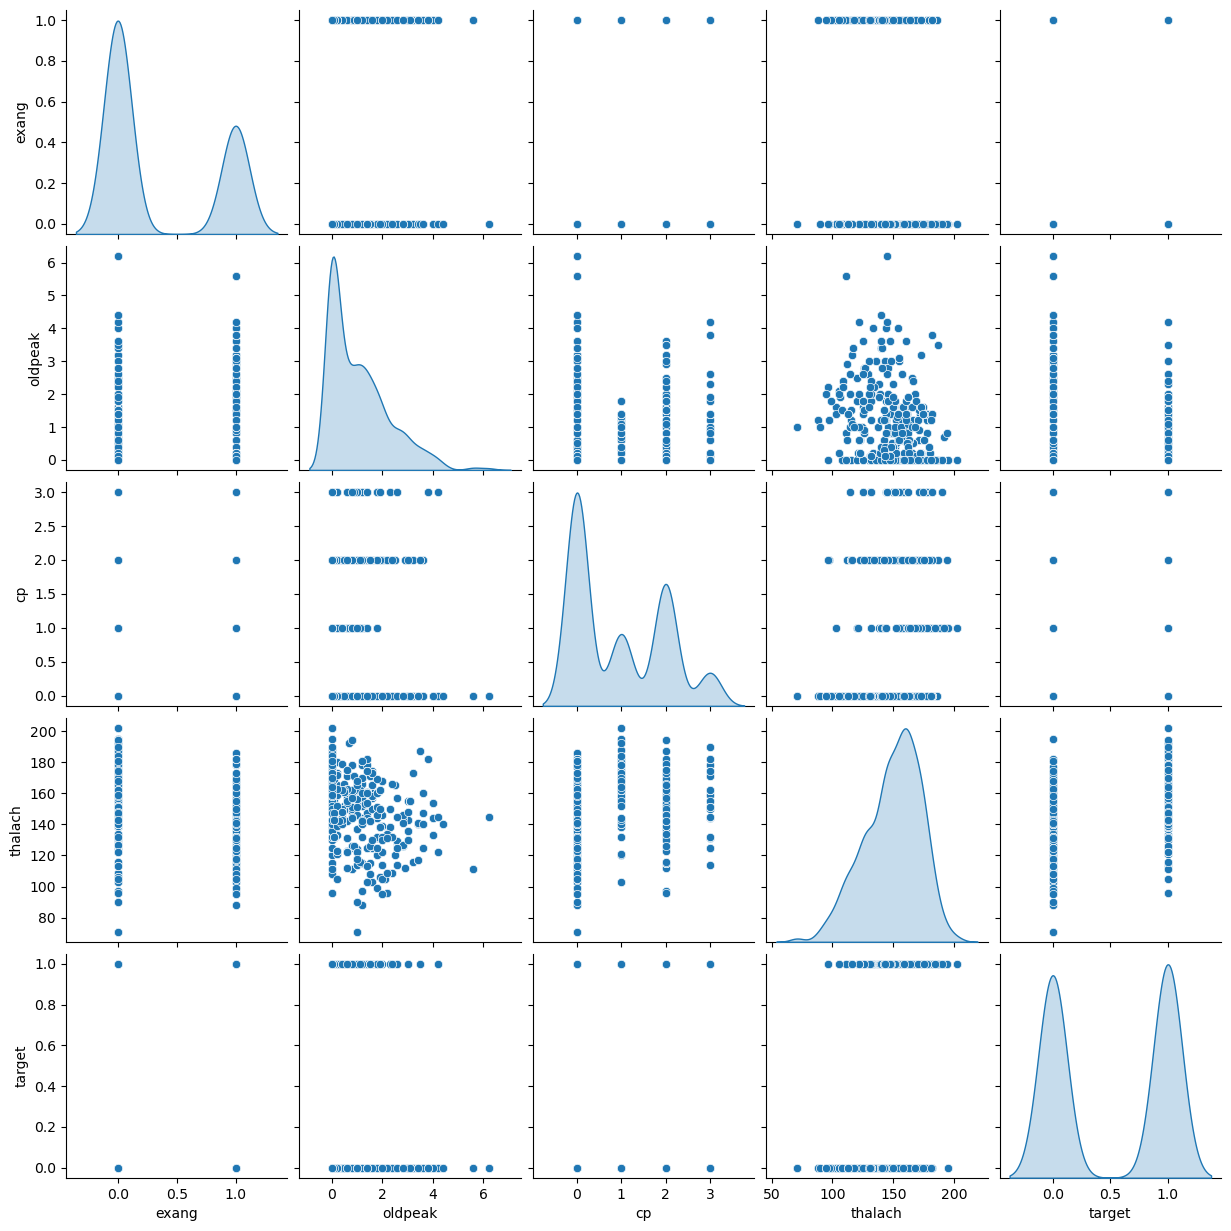

In [29]:
sns.pairplot(df[['exang', 'oldpeak', 'cp', 'thalach', 'target']], diag_kind='kde')
plt.show()

# Train and Test splitting

In [34]:
X = df.drop('target', axis=1)
y = df['target']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Features Scaling

In [59]:
scale = StandardScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

# Build models

### Random forest model

In [60]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [62]:
rfP = rf.predict(X_test)
svcP = svc.predict(X_test)

In [63]:
rfA = accuracy_score(y_test, rfP)
svcA = accuracy_score(y_test, svcP)
print(f"Random Forest accuracy: {rfA}\
        \nSupport Vector Classification accuracy: {svcA}")

Random Forest accuracy: 0.987012987012987        
Support Vector Classification accuracy: 0.9025974025974026


# Upgrade the SVC model

In [65]:
SVCParam = {'C':[10,30, 300, 100,3000, 1000 , 30000,10000],
            'gamma':[0.3, 0.1, 0.01,0.03, 0.001, 0.003],
            'kernel':['rbf','sigmoid','linear']
           },
SVCGrided = GridSearchCV(svc,SVCParam,refit = True,verbose = 3,cv=3, scoring='accuracy')
SVCGrided.fit(X_train,y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV 1/3] END .......C=10, gamma=0.3, kernel=rbf;, score=0.954 total time=   0.0s
[CV 2/3] END .......C=10, gamma=0.3, kernel=rbf;, score=0.958 total time=   0.0s
[CV 3/3] END .......C=10, gamma=0.3, kernel=rbf;, score=0.946 total time=   0.0s
[CV 1/3] END ...C=10, gamma=0.3, kernel=sigmoid;, score=0.762 total time=   0.0s
[CV 2/3] END ...C=10, gamma=0.3, kernel=sigmoid;, score=0.728 total time=   0.0s
[CV 3/3] END ...C=10, gamma=0.3, kernel=sigmoid;, score=0.682 total time=   0.0s
[CV 1/3] END ....C=10, gamma=0.3, kernel=linear;, score=0.837 total time=   0.0s
[CV 2/3] END ....C=10, gamma=0.3, kernel=linear;, score=0.883 total time=   0.0s
[CV 3/3] END ....C=10, gamma=0.3, kernel=linear;, score=0.803 total time=   0.0s
[CV 1/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.946 total time=   0.0s
[CV 2/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 3/3] END .......C=10, gamma=0.1, kernel=rb

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=({'C': [10, 30, 300, 100, 3000, 1000, 30000, 10000],
                          'gamma': [0.3, 0.1, 0.01, 0.03, 0.001, 0.003],
                          'kernel': ['rbf', 'sigmoid', 'linear']},),
             scoring='accuracy', verbose=3)

In [67]:
SVCGP = SVCGrided.predict(X_test)
SVCGA = accuracy_score(y_test,SVCGP)
print(f"SVCGA: {SVCGA}")

SVCGA: 0.9707792207792207


# Submissions

In [81]:
res = {"actual": y_test,
       "prediction": SVCGP}

pd.DataFrame(res).to_csv("submission", index=False)
